In [5]:


################################################
##
## plotting subwords
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt



#######################################################

np.set_printoptions(suppress=True)


#######################################################



In [6]:
ML_raw_data = pd.read_csv('Context_MJ_ML_metrics_results.csv', index_col=False) 



## ML_raw_data.reset_index(drop=True, inplace=True)

In [7]:
result_pd = ML_raw_data[['recall', 'subword','idsubword']]

print(result_pd)

recalls    = result_pd['recall']
idsubwords = result_pd['idsubword']

print(len(recalls))

       recall  subword  idsubword
0    0.723360      NaN        -15
1    0.843045      son         -7
2    0.506037  subword  idsubword
3    0.769554   <mask>     250001
4    0.658268  Анткени     126242
..        ...      ...        ...
894  0.680315      ανά     131329
895  0.770604     就是一个     184382
896  0.685564      Bla      22446
897  0.718110     лени      52651
898  0.770604  တယ္လို႔     158638

[899 rows x 3 columns]
899


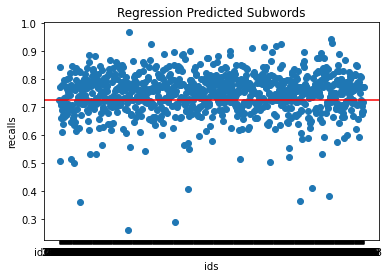

In [8]:

fig = plt.figure()

plt.xlabel("ids")
plt.ylabel("recalls")

plt.scatter(idsubwords, recalls) 
plt.title("Regression Predicted Subwords")
plt.axhline(y=0.723 , color='r', linestyle='-')
plt.savefig('300dpiRegPredSubwords899.png', dpi=300)
plt.show()


In [9]:
df = result_pd 
df
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values('recall', ascending=False)
df_sorted


,recall,subword,idsubword
206,0.965879,習近平,179258
803,0.941732,auskaitė,217411
804,0.926509,安倍,166163
271,0.923360,聡,246300
654,0.922310,avičius,181159
639,0.918110,Hacıyev,186744
603,0.912861,瑜,181308
568,0.909711,uddin,42081
387,0.900262,杨欢,129540
503,0.898688,很清楚,203710


In [10]:
recalls_count    = df_sorted[    df_sorted['recall'] > 0.723 ]
print(len(recalls_count))

598


In [11]:
recalls_count    = df_sorted[    df_sorted['recall'] < 0.723 ]
print(len(recalls_count))

301


In [12]:
x_ratio = 598 / (598 + 301)
x_ratio 

0.6651835372636262

## Repeat with Top N subwords from Regression

In [156]:

N = 500

the_preds_for_ids = pd.read_csv('pred_subwords_selected_for_attack.csv', index_col=False) 


pd.set_option('display.max_rows', None)
the_preds_for_ids = the_preds_for_ids.sort_values('recall', ascending=False)
the_preds_for_ids

,index,recall,idsubword,subword
0,205582,0.999588,250001,<mask>
1,85142,0.999349,126242,Анткени
2,20332,0.999302,25649,сынын
3,132369,0.998857,174794,телот
4,155297,0.998856,198324,gennemført
5,1,0.997751,2,</s>
6,0,0.996479,1,<pad>
7,2,0.995129,3,<unk>
8,178775,0.991808,222317,έργων
9,129306,0.989601,171641,lehetnek


In [157]:



use_these_top_ids = the_preds_for_ids['idsubword'][0:N].to_list()
use_these_top_ids = [str(idx) for idx in use_these_top_ids]
use_these_top_ids

['250001',
 '126242',
 '25649',
 '174794',
 '198324',
 '2',
 '1',
 '3',
 '222317',
 '171641',
 '248212',
 '179147',
 '230543',
 '138360',
 '54231',
 '190215',
 '225080',
 '71774',
 '238454',
 '144056',
 '196406',
 '95353',
 '3309',
 '104615',
 '6',
 '81289',
 '17736',
 '248541',
 '7608',
 '154027',
 '200314',
 '53938',
 '115920',
 '108279',
 '71610',
 '223394',
 '207928',
 '136026',
 '247864',
 '201012',
 '184461',
 '214283',
 '161519',
 '169211',
 '17193',
 '92980',
 '12169',
 '176445',
 '188107',
 '187707',
 '151343',
 '30663',
 '200853',
 '244040',
 '125747',
 '124919',
 '123067',
 '176531',
 '151175',
 '156728',
 '155424',
 '86579',
 '243982',
 '174956',
 '226154',
 '210928',
 '23543',
 '11560',
 '234474',
 '84913',
 '10095',
 '242259',
 '218283',
 '97246',
 '247156',
 '84886',
 '174926',
 '247945',
 '84559',
 '77375',
 '114445',
 '6810',
 '16827',
 '223281',
 '77587',
 '193569',
 '97336',
 '241918',
 '199796',
 '103688',
 '208864',
 '91496',
 '177423',
 '230933',
 '195185',
 '2495

In [158]:
Top_N_data = pd.read_csv('Context_MJ_ML_metrics_results.csv', index_col=False) 



## ML_raw_data.reset_index(drop=True, inplace=True)

In [159]:
Top_N_pd = Top_N_data[['recall', 'subword','idsubword']]



Top_N_recalls    = Top_N_pd['recall']
Top_N_idsubwords = Top_N_pd['idsubword']



In [160]:
print(Top_N_pd)

       recall        subword  idsubword
0    0.723360            NaN        -15
1    0.843045            son         -7
2    0.506037        subword  idsubword
3    0.769554         <mask>     250001
4    0.658268        Анткени     126242
5    0.706562          сынын      25649
6    0.713911          телот     174794
7    0.611549     gennemført     198324
8    0.775853           </s>          2
9    0.687664          <pad>          1
10   0.702887          <unk>          3
11   0.668766          έργων     222317
12   0.639370       lehetnek     171641
13   0.732808              痫     248212
14   0.796325         Jakaya     179147
15   0.662467          hibát     230543
16   0.773228       Mwenyezi     138360
17   0.671916            Blo      54231
18   0.697638             Լե     190215
19   0.735433          Abdül     225080
20   0.710761             Gé      71774
21   0.671391         Wydaje     238454
22   0.797900          जस्ता     144056
23   0.763780          जस्ता     196406


In [161]:
print(len(Top_N_recalls))

899


In [162]:
df = Top_N_pd
## y = df[df['idsubword'] in use_these_top_ids]
y = df.query('idsubword in @use_these_top_ids')
print(y)

       recall      subword idsubword
3    0.769554       <mask>    250001
4    0.658268      Анткени    126242
5    0.706562        сынын     25649
6    0.713911        телот    174794
7    0.611549   gennemført    198324
8    0.775853         </s>         2
9    0.687664        <pad>         1
10   0.702887        <unk>         3
11   0.668766        έργων    222317
12   0.639370     lehetnek    171641
13   0.732808            痫    248212
14   0.796325       Jakaya    179147
15   0.662467        hibát    230543
16   0.773228     Mwenyezi    138360
17   0.671916          Blo     54231
18   0.697638           Լե    190215
19   0.735433        Abdül    225080
20   0.710761           Gé     71774
21   0.671391       Wydaje    238454
22   0.797900        जस्ता    144056
23   0.763780        जस्ता    196406
24   0.673491            ̈     95353
25   0.687139            ́      3309
26   0.710761            ̧    104615
27   0.752231          NaN         6
28   0.803150           对我     81289
2

In [163]:



Top_N_pd  = Top_N_pd[   Top_N_pd['idsubword'].isin(use_these_top_ids)   ]




print(Top_N_pd )

       recall      subword idsubword
3    0.769554       <mask>    250001
4    0.658268      Анткени    126242
5    0.706562        сынын     25649
6    0.713911        телот    174794
7    0.611549   gennemført    198324
8    0.775853         </s>         2
9    0.687664        <pad>         1
10   0.702887        <unk>         3
11   0.668766        έργων    222317
12   0.639370     lehetnek    171641
13   0.732808            痫    248212
14   0.796325       Jakaya    179147
15   0.662467        hibát    230543
16   0.773228     Mwenyezi    138360
17   0.671916          Blo     54231
18   0.697638           Լե    190215
19   0.735433        Abdül    225080
20   0.710761           Gé     71774
21   0.671391       Wydaje    238454
22   0.797900        जस्ता    144056
23   0.763780        जस्ता    196406
24   0.673491            ̈     95353
25   0.687139            ́      3309
26   0.710761            ̧    104615
27   0.752231          NaN         6
28   0.803150           对我     81289
2

In [164]:
Top_N_recalls    = Top_N_pd['recall']
Top_N_idsubwords = Top_N_pd['idsubword']


In [165]:
print(len(Top_N_recalls ))

500


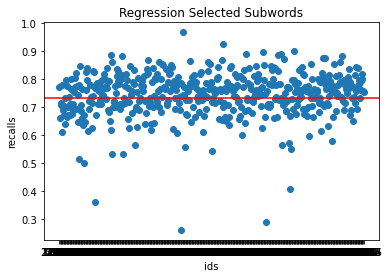

In [166]:


fig = plt.figure()

plt.xlabel("ids")
plt.ylabel("recalls")

plt.scatter(Top_N_idsubwords, Top_N_recalls) 
plt.title("Regression Selected Subwords")
plt.axhline(y=0.73 , color='r', linestyle='-')
plt.savefig('300dpiCopperScrollN.png', dpi=300)
plt.show()



In [167]:
df = Top_N_pd
df
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values('recall', ascending=False)
df_sorted


,recall,subword,idsubword
206,0.965879,習近平,179258
271,0.923360,聡,246300
387,0.900262,杨欢,129540
337,0.894488,avičiaus,241130
309,0.887139,趙,149779
366,0.886614,參選,228075
87,0.884514,離開,77587
361,0.882940,给予,55665
467,0.882415,溥,246105
106,0.881365,一脸,185785


In [168]:
recalls_count    = df_sorted[    df_sorted['recall'] > 0.723 ]
above = len(recalls_count)
print(above)


332


In [169]:
recalls_count    = df_sorted[    df_sorted['recall'] < 0.723 ]
below = len(recalls_count)
print(below)

168


In [170]:
x = above / (above + below)
x

0.664